Use Webscraping to Extract Tesla Revenue Data

In [2]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 150.4 MB/s eta 0:00:00


Use the filterwarnings function to filter or ignore specific warning messages or categories.

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

Extract the Tesla revenue data https://companiesmarketcap.com/tesla/revenue/

On the following web page we have a table with columns name (Year, Revenue and Change) out of which we must extract following columns: 
- Year
- Revenue
- Change

Send an HTTP request to the web page

In [5]:
url = "https://companiesmarketcap.com/tesla/revenue/"

In [6]:
data  = requests.get(url).text
print(data)

<!DOCTYPE html>
<html lang="en-US">
<head>
<title>Tesla (TSLA) - Revenue</title>
<meta charset="utf-8"/>
<link rel="shortcut icon" href="https://companiesmarketcap.com/favicon.ico" type="image/x-icon">
<link rel="apple-touch-icon" sizes="57x57" href="/img/icons/apple-icon-57x57.png">
<link rel="apple-touch-icon" sizes="60x60" href="/img/icons/apple-icon-60x60.png">
<link rel="apple-touch-icon" sizes="72x72" href="/img/icons/apple-icon-72x72.png">
<link rel="apple-touch-icon" sizes="76x76" href="/img/icons/apple-icon-76x76.png">
<link rel="apple-touch-icon" sizes="114x114" href="/img/icons/apple-icon-114x114.png">
<link rel="apple-touch-icon" sizes="120x120" href="/img/icons/apple-icon-120x120.png">
<link rel="apple-touch-icon" sizes="144x144" href="/img/icons/apple-icon-144x144.png">
<link rel="apple-touch-icon" sizes="152x152" href="/img/icons/apple-icon-152x152.png">
<link rel="apple-touch-icon" sizes="180x180" href="/img/icons/apple-icon-180x180.png">
<link rel="icon" type="image/pn

Parsing the data using the BeautifulSoup library

In [7]:
soup = BeautifulSoup(data, 'html.parser')

Identify the HTML tags: Create an empty data frame using the pd.DataFrame() function with the following columns: "Year", "Revenue", "Change".

In [8]:
tesla_revenue = pd.DataFrame(columns=["Year", "Revenue", "Change"])

Use a BeautifulSoup method for extracting data

In [9]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    year = col[0].text
    revenue = col[1].text
    change = col[2].text
    
    # Finally we append the data of each row to the table
    tesla_revenue = pd.concat([tesla_revenue,pd.DataFrame({"Year":[year], "Revenue":[revenue], "Change":[change]})], ignore_index=True)    


Print the extracted data

In [10]:
tesla_revenue.tail()

,Year,Revenue,Change
12,2013,$2.01 B,387.23%
13,2012,$0.41 B,102.34%
14,2011,$0.20 B,74.95%
15,2010,$0.11 B,4.29%
16,2009,$0.11 B,


Question 4: Use Webscraping to Extract GME Revenue Data
Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

Extract the GameStock revenue data https://companiesmarketcap.com/gamestop/revenue/
On the following web page we have a table with columns name (Year, Revenue and Change) out of which we must extract following columns:
Year
Revenue
Change

In [11]:
url = "https://companiesmarketcap.com/gamestop/revenue/"

In [12]:
data  = requests.get(url).text
print(data)

<!DOCTYPE html>
<html lang="en-US">
<head>
<title>GameStop
 (GME) - Revenue</title>
<meta charset="utf-8"/>
<link rel="shortcut icon" href="https://companiesmarketcap.com/favicon.ico" type="image/x-icon">
<link rel="apple-touch-icon" sizes="57x57" href="/img/icons/apple-icon-57x57.png">
<link rel="apple-touch-icon" sizes="60x60" href="/img/icons/apple-icon-60x60.png">
<link rel="apple-touch-icon" sizes="72x72" href="/img/icons/apple-icon-72x72.png">
<link rel="apple-touch-icon" sizes="76x76" href="/img/icons/apple-icon-76x76.png">
<link rel="apple-touch-icon" sizes="114x114" href="/img/icons/apple-icon-114x114.png">
<link rel="apple-touch-icon" sizes="120x120" href="/img/icons/apple-icon-120x120.png">
<link rel="apple-touch-icon" sizes="144x144" href="/img/icons/apple-icon-144x144.png">
<link rel="apple-touch-icon" sizes="152x152" href="/img/icons/apple-icon-152x152.png">
<link rel="apple-touch-icon" sizes="180x180" href="/img/icons/apple-icon-180x180.png">
<link rel="icon" type="image

In [13]:
soup = BeautifulSoup(data, 'html.parser')

In [14]:
gme_revenue = pd.DataFrame(columns=["Year", "Revenue", "Change"])

In [15]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    year = col[0].text
    revenue = col[1].text
    change = col[2].text
    
    # Finally we append the data of each row to the table
    gme_revenue = pd.concat([gme_revenue,pd.DataFrame({"Year":[year], "Revenue":[revenue], "Change":[change]})], ignore_index=True)    

In [16]:
gme_revenue.tail()

,Year,Revenue,Change
20,2005,$3.09 B,67.78%
21,2004,$1.84 B,16.72%
22,2003,$1.57 B,16.71%
23,2002,$1.35 B,20.66%
24,2001,$1.12 B,


Question 6: Plot GameStop Stock Graph
Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

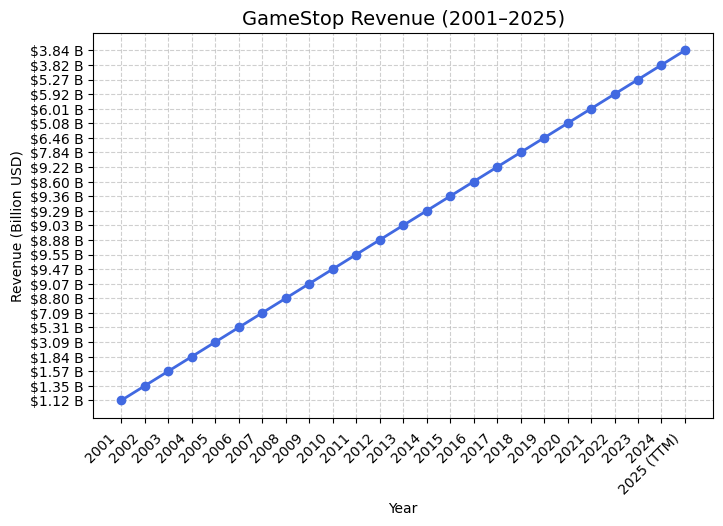

In [27]:
import matplotlib.pyplot as plt
gme_revenue_year = gme_revenue.sort_values('Year', ascending=True)
plt.figure(figsize=(8,5))
plt.plot(gme_revenue_year["Year"], gme_revenue_year["Revenue"], marker='o', color='royalblue', linewidth=2)
plt.title("GameStop Revenue (2001–2025)", fontsize=14)
plt.xlabel("Year")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Revenue (Billion USD)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()